# Data

This dataset is obtained from Kaggle and it contains English Premier League Players Dataset (2017/18) with FPL data, popularity and market values.
[kaggle_link](https://www.kaggle.com/datasets/merfarukgnaydn/transfermarkt-2022-summer-all-transfers)


## Content

name: Name of the player

club: Club of the player

age : Age of the player

position : The usual position on the pitch

position_cat :

1 for attackers

2 for midfielders

3 for defenders

4 for goalkeepers

market_value : As on transfermrkt.com on July 20th, 2017. In million euros

page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017

fpl_value : Value in Fantasy Premier League as on July 20th, 2017

fpl_sel : % of FPL players who have selected that player in their team

fpl_points : FPL points accumulated over the previous season

region:

1 for England

2 for EU

3 for Americas

4 for Rest of World

nationality

new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)

age_cat

club_id

big_club: Whether one of the Top 6 clubs

new_signing: Whether a new signing for 2017/18 (till 20th July)

# Goal

The aim of this project is to predict the tranfer market value of a player based on attributes like age, playing position, team, fpl value etc.

## Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../Transfer Fees Prediction/Data/epldata_final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [4]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


## Exploratory Data Analysis

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,461.0,26.804772,3.961892,17.00,24.0,27.0,30.0,38.0
position_cat,461.0,2.180043,1.000061,1.00,1.0,2.0,3.0,4.0
market_value,461.0,11.012039,12.257403,0.05,3.0,7.0,15.0,75.0
page_views,461.0,763.776573,931.805757,3.00,220.0,460.0,896.0,7664.0
fpl_value,461.0,5.447939,1.346695,4.00,4.5,5.0,5.5,12.5
fpl_points,461.0,57.314534,53.113811,0.00,5.0,51.0,94.0,264.0
region,460.0,1.993478,0.957689,1.00,1.0,2.0,2.0,4.0
new_foreign,461.0,0.034707,0.183236,0.00,0.0,0.0,0.0,1.0
age_cat,461.0,3.206074,1.279795,1.00,2.0,3.0,4.0,6.0
club_id,461.0,10.334056,5.726475,1.00,6.0,10.0,15.0,20.0


In [6]:
df.sort_values(by='page_views',ascending=False).head(10)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
143,Wayne Rooney,Everton,31,SS,1,15.0,7664,7.5,20.90%,76,1.0,England,0,4,7,0,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,19.50%,115,2.0,France,0,2,12,1,1
376,Dele Alli,Tottenham,21,CM,2,45.0,4626,9.5,38.60%,225,1.0,England,0,1,17,1,0
93,Diego Costa,Chelsea,28,CF,1,50.0,4454,10.0,3.00%,196,2.0,Spain,0,4,5,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
251,Gabriel Jesus,Manchester+City,20,CF,1,30.0,4254,10.5,15.20%,67,3.0,Brazil,0,1,11,1,1
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,2.30%,224,2.0,Belgium,0,3,5,1,0
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,35.10%,224,1.0,England,0,2,17,1,0
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,9.70%,175,3.0,Argentina,0,4,11,1,0


Most famous players according to page views.

##

In [7]:
sns.set_style("darkgrid")

<Axes: xlabel='market_value', ylabel='Count'>

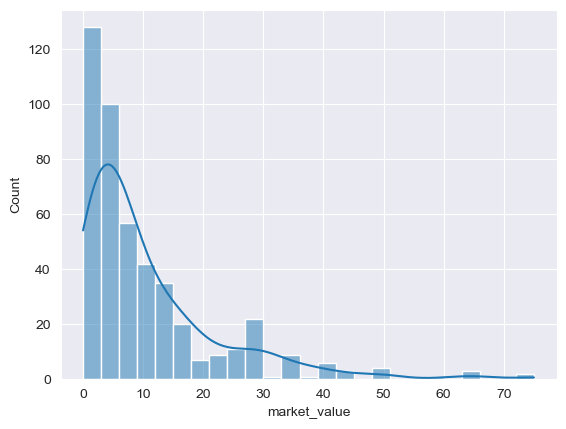

In [8]:
sns.histplot(x='market_value',data=df,kde=True)

Clearly not a normal distribution, but this was expected. Teams tend to have few elite players, and a large number of low + mid value players in their squads.

##

<Axes: xlabel='market_value', ylabel='Count'>

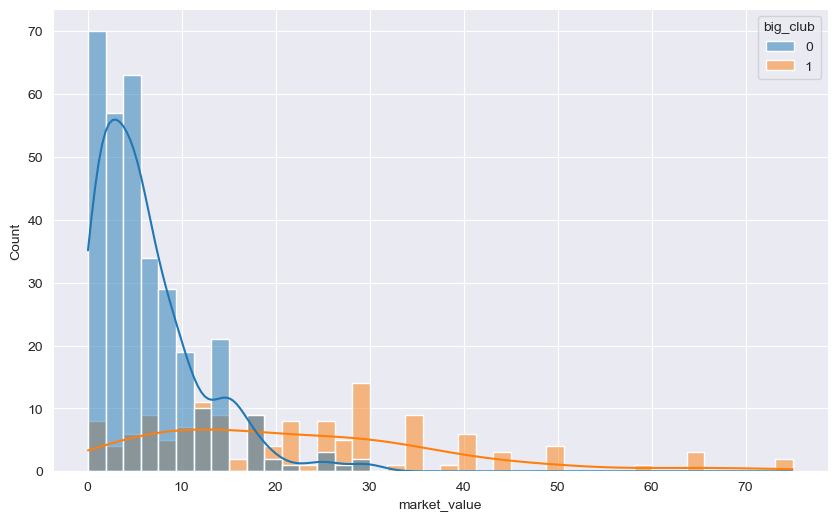

In [9]:
plt.figure(figsize=(10,6),)
sns.histplot(x='market_value',data=df,kde=True,hue='big_club',bins=40)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

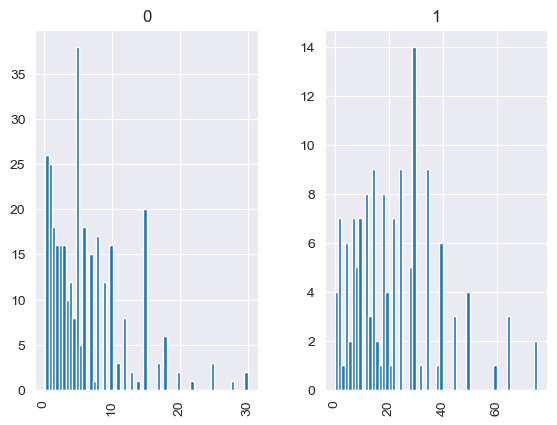

In [10]:
df.hist(column='market_value',by='big_club',bins=60)

The top 6 seem to have a spread of players, whereas the others have a large majority of players worth under 10 million

##

<Axes: xlabel='position', ylabel='market_value'>

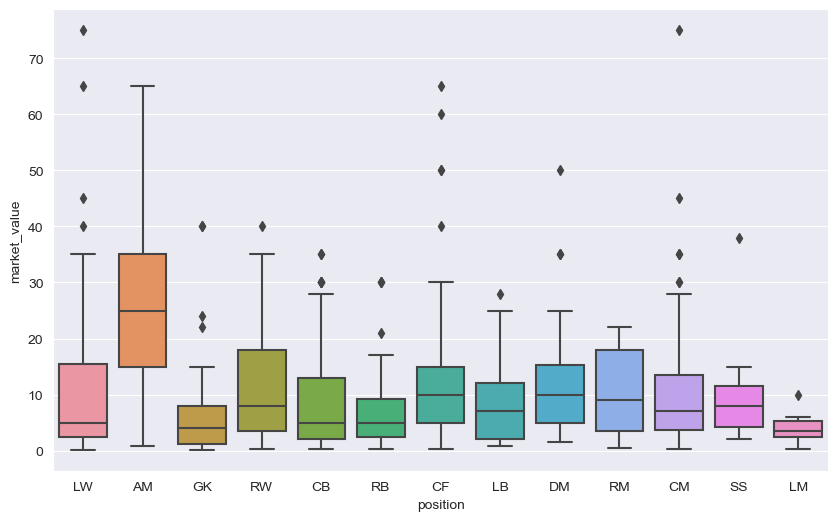

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='position',y='market_value',data=df)

<Axes: xlabel='market_value', ylabel='Density'>

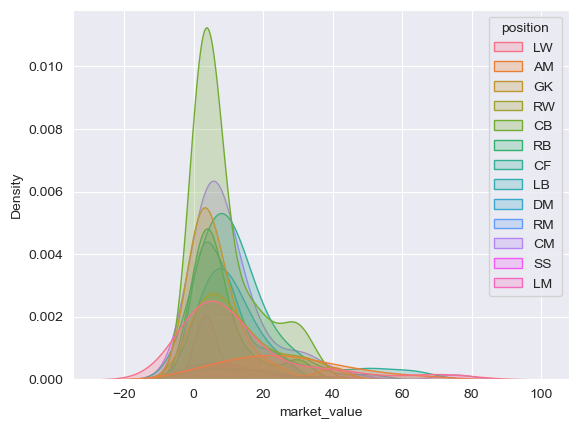

In [12]:
sns.kdeplot(x='market_value',hue='position',data=df,fill=True)

In [13]:
df.groupby('position').mean(numeric_only=True)['market_value'].sort_values(ascending=False)

position
AM    26.161765
CF    13.823770
LW    13.293056
DM    12.347222
RW    12.195312
SS    11.357143
CM    10.960317
RM    10.600000
CB     8.972353
LB     8.300000
RB     7.742647
GK     7.234524
LM     4.000000
Name: market_value, dtype: float64

The top earning positions are AM, CF, and LW.

##

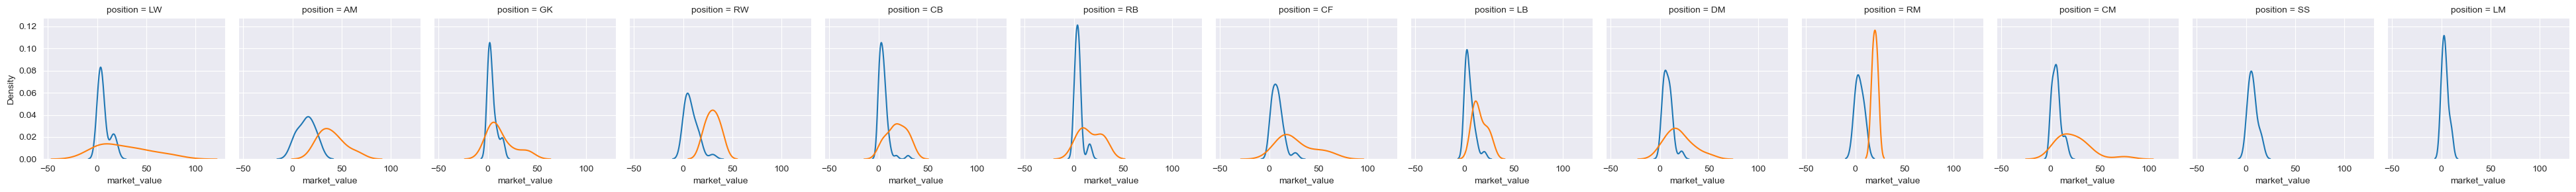

In [14]:
grid = sns.FacetGrid(data=df,col='position', hue='big_club')

grid.map(sns.kdeplot, 'market_value',warn_singular=False)

For almost all the postions, players in smaller clubs are valued much less than the value of the players at bigger clubs

##

In [15]:
df['nationality'].value_counts().head(8)

England        156
Spain           28
France          25
Netherlands     20
Belgium         18
Ireland         17
Argentina       17
Germany         16
Name: nationality, dtype: int64

In [16]:
df.groupby('nationality').mean(numeric_only=True).sort_values(by='market_value',ascending=False).head(10)['market_value']

nationality
Chile            36.500000
Armenia          35.000000
Belgium          25.805556
Kenya            25.000000
Algeria          22.333333
Brazil           21.750000
France           17.980000
Croatia          17.000000
Spain            16.803571
Cote d'Ivoire    15.750000
Name: market_value, dtype: float64

The majority of the players in the data set come from England. But the players valued highest seem to be non-english. We cannot however make any conclusion because this is an English Premiere League data set and players who come to England from other countries probably are very good and play for big clubs (for example almost 70% of Belgian players are in big club), whereas English players are mostly playing for small clubs.

<Axes: xlabel='region', ylabel='market_value'>

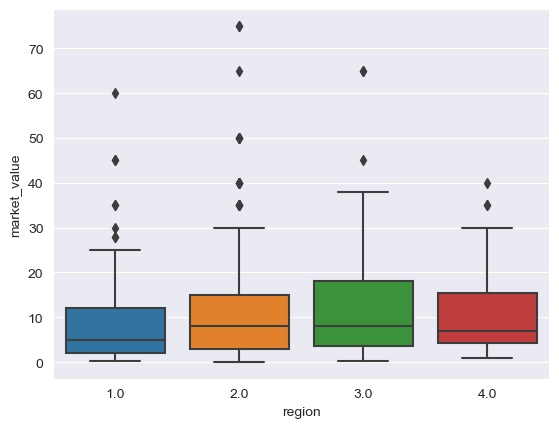

In [17]:
sns.boxplot(x='region',y='market_value',data=df)

##

<Axes: xlabel='age', ylabel='market_value'>

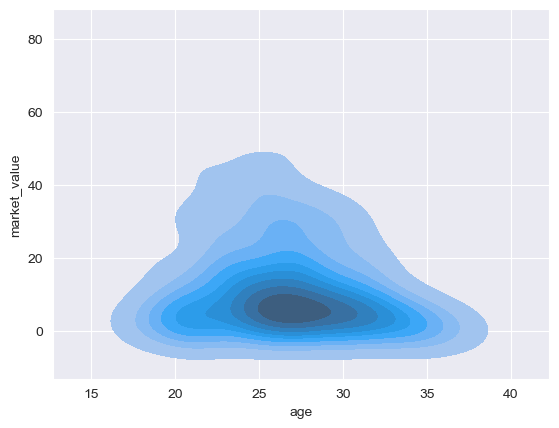

In [18]:
sns.kdeplot(x='age',y='market_value',data=df,fill=True)

Players in the age between 25-30 years have the highest market values. This makes sense as a footballers prime is between 25-30 years.

##

In [19]:
df['position_cat_name']=df['position_cat'].map({1:'attackers',2:'midfielders',3:'defenders',4:'goalkeepers'})

<Axes: xlabel='club', ylabel='market_value'>

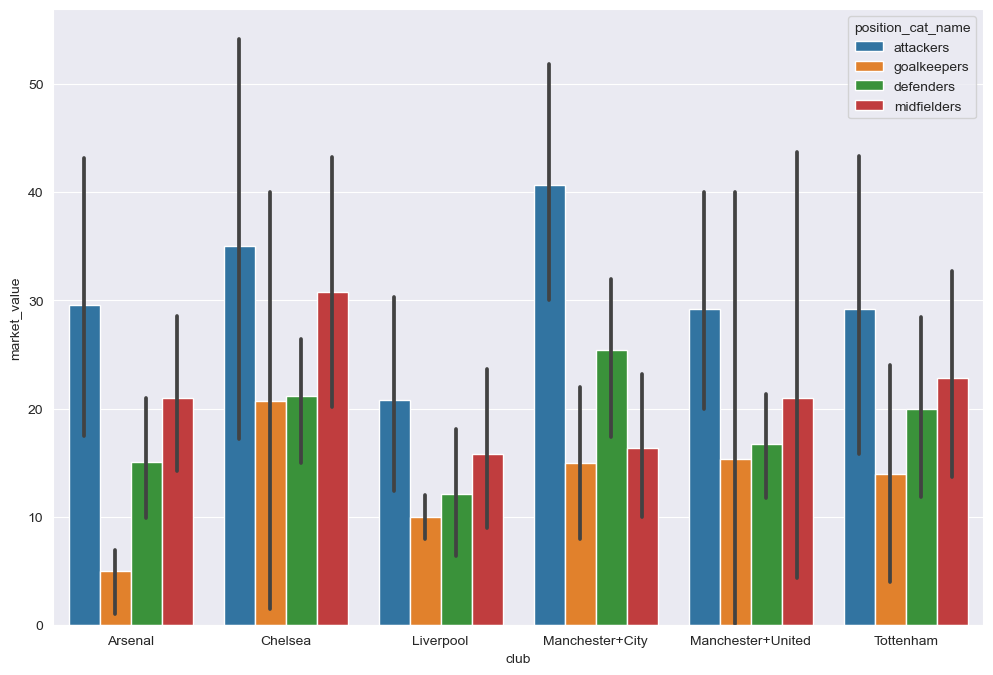

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(data=df[df['big_club']==1],x='club',y='market_value',hue='position_cat_name')

How do each of the top 6 stack up, in terms of positional strength?

##

# Correlations

In [21]:
df.corr(numeric_only=True)['market_value'].sort_values(ascending=False)

market_value    1.000000
fpl_value       0.788653
page_views      0.739657
fpl_points      0.615155
big_club        0.593483
new_signing     0.131321
region          0.101659
new_foreign     0.098056
club_id        -0.046068
age_cat        -0.117682
age            -0.132396
position_cat   -0.217637
Name: market_value, dtype: float64

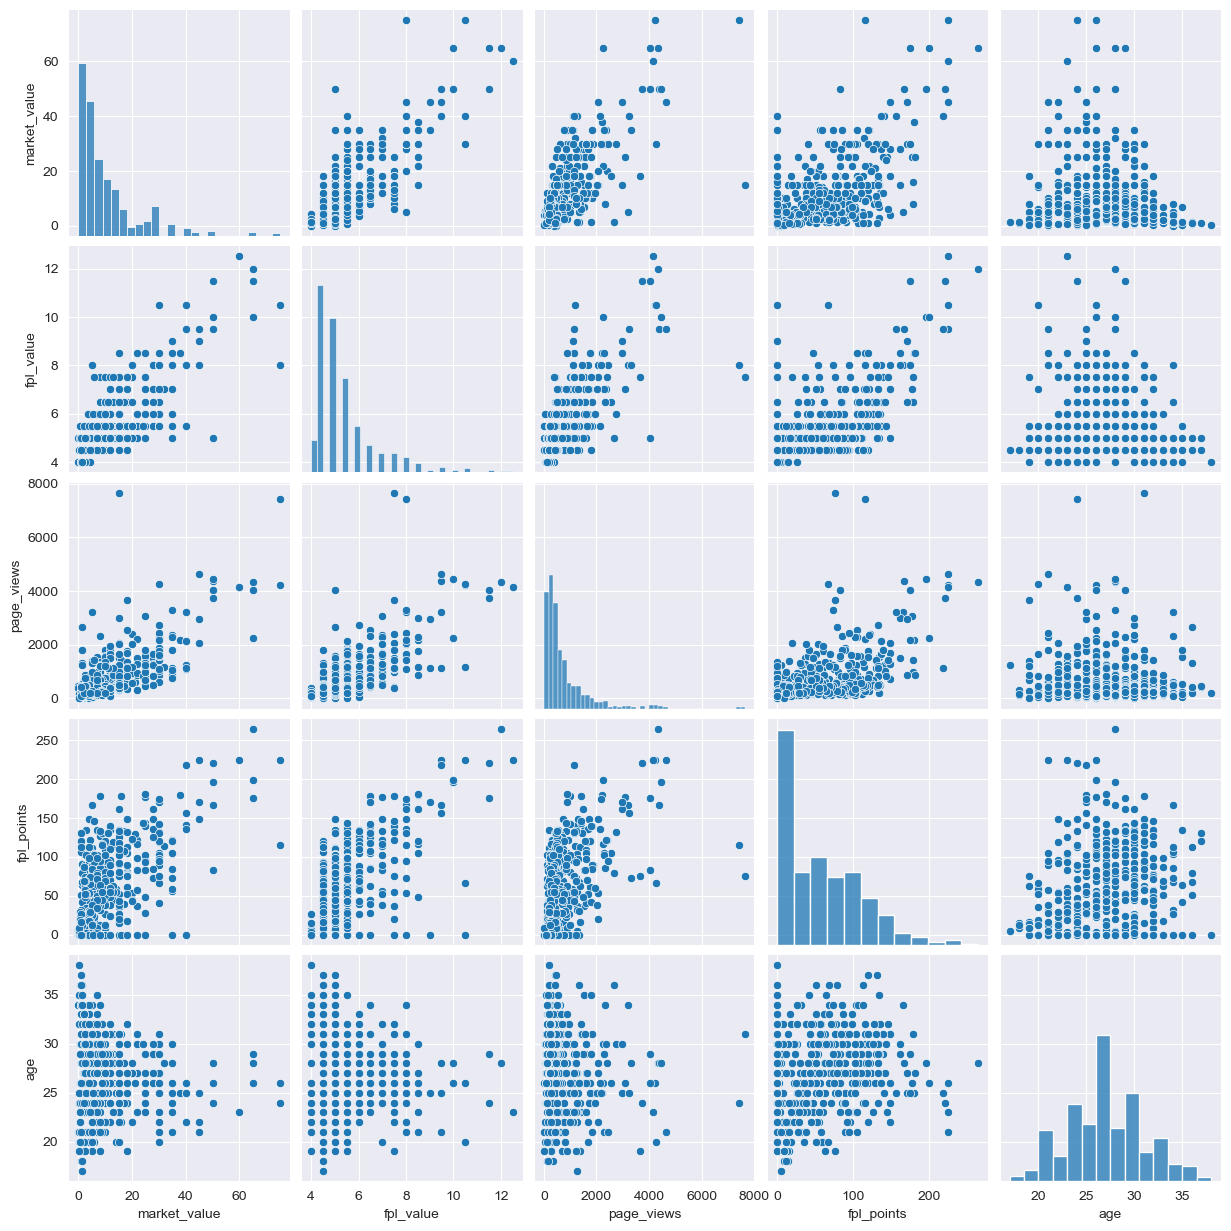

In [22]:
sns.pairplot(df[['market_value','fpl_value','page_views','fpl_points','age']])

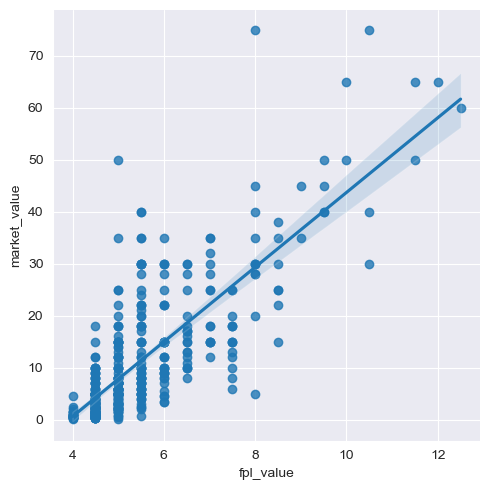

In [23]:
sns.lmplot(x='fpl_value',y='market_value',data=df)

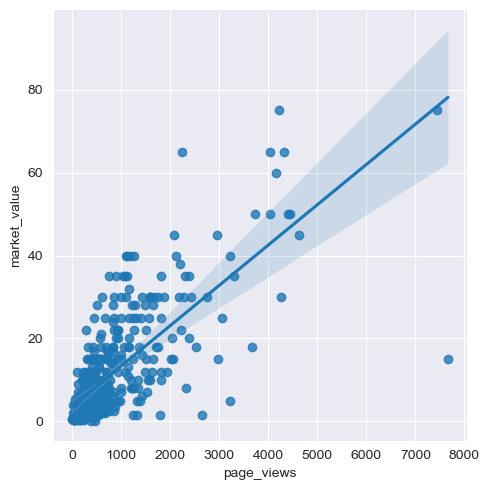

In [24]:
sns.lmplot(x='page_views',y='market_value',data=df)

In [25]:
#converting fpl_sel dtype from str to float so that we can use it for data exploration
df['fpl_sel']=df['fpl_sel'].apply(lambda x:float(x[:-1]))

<Axes: xlabel='fpl_sel', ylabel='market_value'>

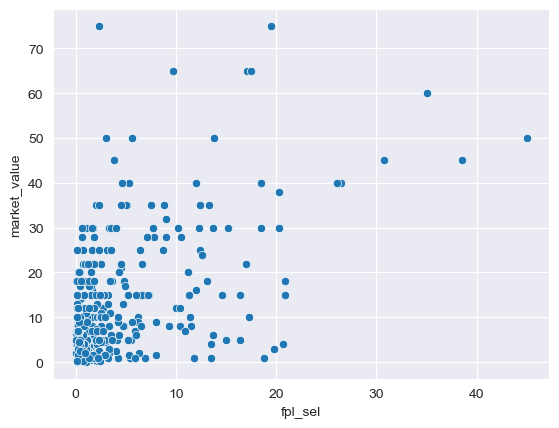

In [26]:
sns.scatterplot(x='fpl_sel',y='market_value',data=df)

Missing Data & Duplicate Data

In [27]:
df.isnull().sum()

name                 0
club                 0
age                  0
position             0
position_cat         0
market_value         0
page_views           0
fpl_value            0
fpl_sel              0
fpl_points           0
region               1
nationality          0
new_foreign          0
age_cat              0
club_id              0
big_club             0
new_signing          0
position_cat_name    0
dtype: int64

In [28]:
df=df.dropna()

In [29]:
df.duplicated().sum()

0

In [30]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,position_cat_name
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3.0,Chile,0,4,1,1,0,attackers
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2.0,Germany,0,4,1,1,0,attackers
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0,goalkeepers
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1.0,England,0,4,1,1,0,attackers
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2.0,France,0,4,1,1,0,defenders


##

## Train Test Split

In [31]:
df.select_dtypes(include=['number']).columns

Index(['age', 'position_cat', 'market_value', 'page_views', 'fpl_value',
       'fpl_sel', 'fpl_points', 'region', 'new_foreign', 'age_cat', 'club_id',
       'big_club', 'new_signing'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=df[['age_cat', 'position_cat', 'page_views', 'fpl_value','fpl_sel', 'fpl_points', 'region', 'new_foreign','big_club', 'new_signing']]
y=df['market_value']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Scaling the data

In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [36]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
X_train_scaled

array([[0.4       , 1.        , 0.03928991, ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.33333333, 0.0233651 , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.33333333, 0.09137188, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6       , 0.33333333, 0.05978332, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.00156638, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.33333333, 0.33076622, ..., 0.        , 1.        ,
        0.        ]])

## Training the Model

Using Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [40]:
lr.coef_

array([-3.82412654,  2.42476769,  7.84178335, 31.48567246,  5.88504635,
       11.76364525,  2.01318459,  4.50363888,  6.94239392,  0.0326704 ])

In [41]:
pd.DataFrame(lr.coef_,X_train.columns,columns=['Coeff'])

,Coeff
age_cat,-3.824127
position_cat,2.424768
page_views,7.841783
fpl_value,31.485672
fpl_sel,5.885046
fpl_points,11.763645
region,2.013185
new_foreign,4.503639
big_club,6.942394
new_signing,0.032670


In [42]:
predictions=lr.predict(X_test_scaled)

Text(0, 0.5, 'true y')

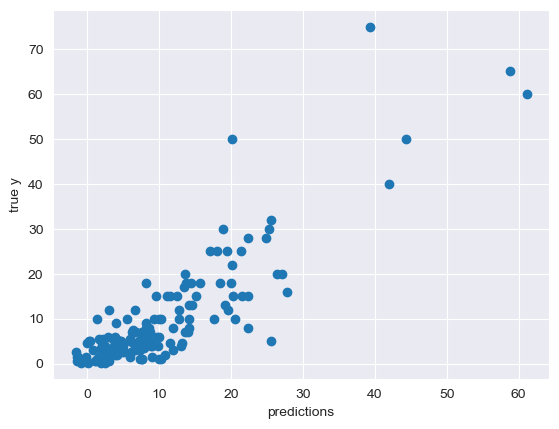

In [43]:
plt.scatter(predictions,y_test)

plt.xlabel('predictions')
plt.ylabel('true y')

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R^2 score', metrics.r2_score(y_test, predictions))

MAE: 4.06655279638607
MSE: 37.95616766989661
RMSE: 6.1608577057010985
R^2 score 0.7389490904601101


<Axes: xlabel='market_value', ylabel='Count'>

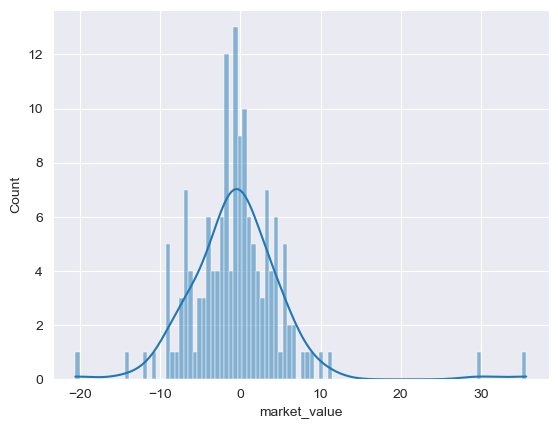

In [45]:
sns.histplot((y_test-predictions),kde=True,bins=100)

In [46]:
import random

random_ind = random.randint(0,len(df))

new_player = df.drop('market_value',axis=1).iloc[random_ind]
new_player

name                 Stefano Okaka
club                       Watford
age                             27
position                        CF
position_cat                     1
page_views                     708
fpl_value                      5.5
fpl_sel                        0.2
fpl_points                      43
region                         2.0
nationality                  Italy
new_foreign                      0
age_cat                          3
club_id                         18
big_club                         0
new_signing                      1
position_cat_name        attackers
Name: 408, dtype: object

In [47]:
new_player_X=new_player[['age_cat', 'position_cat', 'page_views', 'fpl_value','fpl_sel', 'fpl_points', 'region', 'new_foreign','big_club', 'new_signing']]

In [48]:
new_player_X=scaler.transform(new_player_X.values.reshape(-1, 10))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [49]:
lr.predict(new_player_X)

array([7.15780788])

In [50]:
df.iloc[random_ind]['market_value']

6.0

## Using ANN

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [52]:
# Number of input features 
len(X.columns)

10

In [53]:
model= Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(),metrics='mae')

In [54]:
history = model.fit(X_train_scaled, y_train, epochs=400, validation_data=(X_test_scaled, y_test), batch_size=128, callbacks=[early_stop])

Epoch 1/400
3/3 [==============================] - 1s 82ms/step - loss: 285.1553 - mae: 11.5365 - val_loss: 239.7906 - val_mae: 9.7183
Epoch 2/400
3/3 [==============================] - 0s 17ms/step - loss: 280.1327 - mae: 11.3597 - val_loss: 235.6652 - val_mae: 9.5415
Epoch 3/400
3/3 [==============================] - 0s 16ms/step - loss: 275.4891 - mae: 11.1834 - val_loss: 231.3418 - val_mae: 9.3581
Epoch 4/400
3/3 [==============================] - 0s 16ms/step - loss: 270.1580 - mae: 10.9977 - val_loss: 226.7369 - val_mae: 9.1699
Epoch 5/400
3/3 [==============================] - 0s 14ms/step - loss: 264.6292 - mae: 10.8008 - val_loss: 221.6584 - val_mae: 8.9749
Epoch 6/400
3/3 [==============================] - 0s 16ms/step - loss: 258.3607 - mae: 10.5878 - val_loss: 215.9520 - val_mae: 8.7571
Epoch 7/400
3/3 [==============================] - 0s 16ms/step - loss: 251.5192 - mae: 10.3677 - val_loss: 209.5325 - val_mae: 8.5215
Epoch 8/400
3/3 [==============================] - 0s 1

3/3 [==============================] - 0s 15ms/step - loss: 36.9974 - mae: 4.1977 - val_loss: 39.2966 - val_mae: 4.2931
Epoch 63/400
3/3 [==============================] - 0s 15ms/step - loss: 36.8354 - mae: 4.1876 - val_loss: 39.1146 - val_mae: 4.2777
Epoch 64/400
3/3 [==============================] - 0s 17ms/step - loss: 36.7206 - mae: 4.1816 - val_loss: 38.9174 - val_mae: 4.2591
Epoch 65/400
3/3 [==============================] - 0s 15ms/step - loss: 36.5724 - mae: 4.1705 - val_loss: 38.6800 - val_mae: 4.2417
Epoch 66/400
3/3 [==============================] - 0s 14ms/step - loss: 36.4669 - mae: 4.1651 - val_loss: 38.4930 - val_mae: 4.2286
Epoch 67/400
3/3 [==============================] - 0s 15ms/step - loss: 36.4652 - mae: 4.1641 - val_loss: 38.3904 - val_mae: 4.2304
Epoch 68/400
3/3 [==============================] - 0s 16ms/step - loss: 36.2446 - mae: 4.1560 - val_loss: 38.2638 - val_mae: 4.2225
Epoch 69/400
3/3 [==============================] - 0s 15ms/step - loss: 36.0972 -

3/3 [==============================] - 0s 16ms/step - loss: 30.9252 - mae: 3.8190 - val_loss: 34.4298 - val_mae: 3.8364
Epoch 124/400
3/3 [==============================] - 0s 16ms/step - loss: 30.7916 - mae: 3.8094 - val_loss: 34.3844 - val_mae: 3.8375
Epoch 125/400
3/3 [==============================] - 0s 17ms/step - loss: 30.6393 - mae: 3.8043 - val_loss: 34.2854 - val_mae: 3.8391
Epoch 126/400
3/3 [==============================] - 0s 15ms/step - loss: 30.5113 - mae: 3.7991 - val_loss: 34.1726 - val_mae: 3.8355
Epoch 127/400
3/3 [==============================] - 0s 16ms/step - loss: 30.4381 - mae: 3.8003 - val_loss: 34.1233 - val_mae: 3.8322
Epoch 128/400
3/3 [==============================] - 0s 15ms/step - loss: 30.3326 - mae: 3.7972 - val_loss: 34.0302 - val_mae: 3.8189
Epoch 129/400
3/3 [==============================] - 0s 15ms/step - loss: 30.1782 - mae: 3.7751 - val_loss: 33.9521 - val_mae: 3.7981
Epoch 130/400
3/3 [==============================] - 0s 15ms/step - loss: 30

3/3 [==============================] - 0s 15ms/step - loss: 24.9754 - mae: 3.5210 - val_loss: 32.5022 - val_mae: 3.6541
Epoch 185/400
3/3 [==============================] - 0s 16ms/step - loss: 24.8860 - mae: 3.5094 - val_loss: 32.5018 - val_mae: 3.6430
Epoch 186/400
3/3 [==============================] - 0s 15ms/step - loss: 24.7538 - mae: 3.4847 - val_loss: 32.5740 - val_mae: 3.6378
Epoch 187/400
3/3 [==============================] - 0s 16ms/step - loss: 24.6641 - mae: 3.4616 - val_loss: 32.6645 - val_mae: 3.6341
Epoch 188/400
3/3 [==============================] - 0s 15ms/step - loss: 24.6682 - mae: 3.4577 - val_loss: 32.7193 - val_mae: 3.6370
Epoch 189/400
3/3 [==============================] - 0s 15ms/step - loss: 24.5343 - mae: 3.4504 - val_loss: 32.7492 - val_mae: 3.6406
Epoch 190/400
3/3 [==============================] - 0s 15ms/step - loss: 24.4801 - mae: 3.4559 - val_loss: 32.7691 - val_mae: 3.6504
Epoch 191/400
3/3 [==============================] - 0s 16ms/step - loss: 24

3/3 [==============================] - 0s 16ms/step - loss: 21.2090 - mae: 3.2391 - val_loss: 31.4171 - val_mae: 3.5706
Epoch 246/400
3/3 [==============================] - 0s 19ms/step - loss: 21.1430 - mae: 3.2323 - val_loss: 31.5260 - val_mae: 3.5644
Epoch 247/400
3/3 [==============================] - 0s 21ms/step - loss: 21.0626 - mae: 3.2080 - val_loss: 31.5850 - val_mae: 3.5612
Epoch 248/400
3/3 [==============================] - 0s 20ms/step - loss: 21.0210 - mae: 3.2027 - val_loss: 31.4611 - val_mae: 3.5591
Epoch 249/400
3/3 [==============================] - 0s 16ms/step - loss: 20.9939 - mae: 3.1997 - val_loss: 31.5024 - val_mae: 3.5555
Epoch 250/400
3/3 [==============================] - 0s 17ms/step - loss: 20.9286 - mae: 3.2014 - val_loss: 31.3852 - val_mae: 3.5536
Epoch 251/400
3/3 [==============================] - 0s 16ms/step - loss: 20.9140 - mae: 3.1930 - val_loss: 31.5310 - val_mae: 3.5526
Epoch 252/400
3/3 [==============================] - 0s 15ms/step - loss: 20

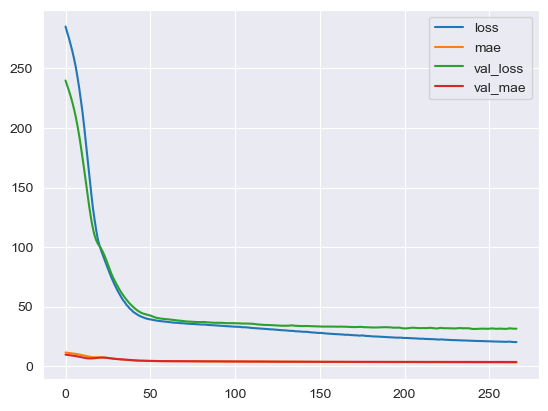

In [55]:
losses = pd.DataFrame(history.history)
losses.plot()
plt.show()

In [56]:
predictions1=model.predict(X_test_scaled)

5/5 [==============================] - 0s 1ms/step


In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
print('R^2 score', metrics.r2_score(y_test, predictions1))

MAE: 3.5674144279603897
MSE: 31.51300260989987
RMSE: 5.613644325204428
R^2 score 0.7832632086254641


Text(0, 0.5, 'true y')

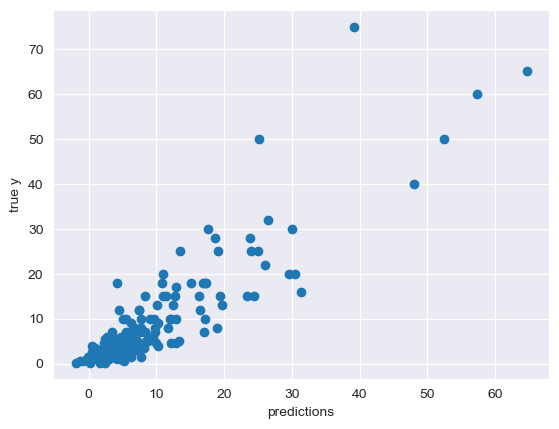

In [58]:
plt.scatter(predictions1,y_test)

plt.xlabel('predictions')
plt.ylabel('true y')

In [99]:
import random

random_ind = random.randint(0,len(X_test))

new_player = X_test.iloc[random_ind]
new_player

age_cat           2.0
position_cat      3.0
page_views      454.0
fpl_value         6.0
fpl_sel           6.4
fpl_points        0.0
region            2.0
new_foreign       1.0
big_club          1.0
new_signing       0.0
Name: 110, dtype: float64

In [100]:
new_player_X=new_player[['age_cat', 'position_cat', 'page_views', 'fpl_value','fpl_sel', 'fpl_points', 'region', 'new_foreign','big_club', 'new_signing']]
new_player_X=scaler.transform(new_player_X.values.reshape(-1, 10))
print('Predicted Transfer Value: ',model.predict(new_player_X)[0][0])
print('Actual Tranfer Value: ',y_test.iloc[random_ind])

1/1 [==============================] - 0s 29ms/step
Predicted Transfer Value:  23.926153
Actual Tranfer Value:  25.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
